# Covariance estimation from data sets 

 ## Inspect 2-dimensional data set
 
__Tasks:__ 
 1. Inspect how the 2-dimensional toy data are constructed. 
 2. Visually inspect the data using a scatterplot (plt.scatter(...)) and a histogram (plt.hist(...)). Use different configurations of the covariance and plot them all to the same figure. Therefore, please review the properties of a covariance matrix.

/home/ady/.local/lib/python3.5/site-packages/ipykernel_launcher.py:21: RuntimeWarning: covariance is not positive-semidefinite.


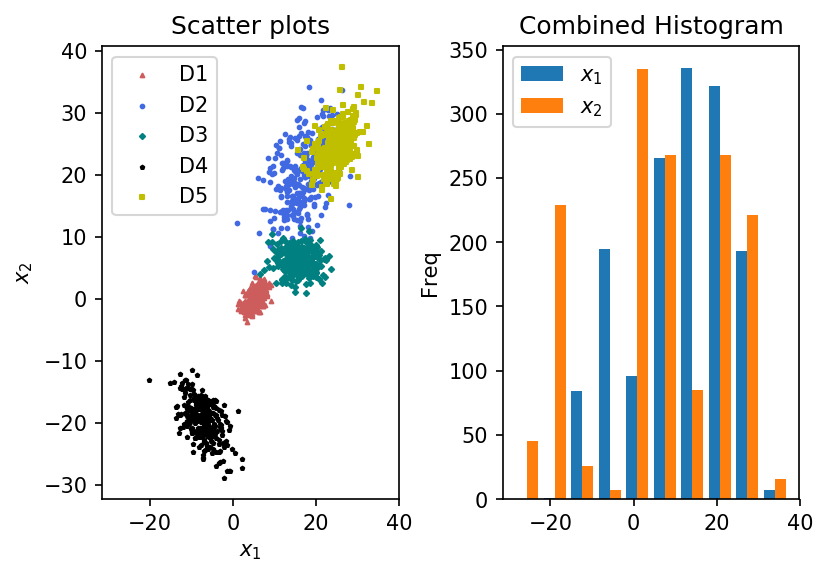

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Assign the "true" mean and covariance of your toy dataset
mean = [5, 0]
N_samples = 150 * 2


def randInt(n=1):
    return np.random.randint(-10, 30, n)


cov0 = [[2, 1], [1, 2]]  # diagonal covariance
cov1 = randInt((2, 2)) + randInt()
cov2 = randInt((2, 2)) * np.identity(2) * -1


# Draw samples from your dataset
def draw_s(mean, cov):
    return np.random.multivariate_normal(mean, cov, N_samples)


X0 = draw_s(mean, cov0)
X1 = draw_s(randInt(2), cov1)
X2 = draw_s(randInt(2), cov2)
COVxx = 5
COVxy = 10
X3 = draw_s([-7, -20], [[COVxx, -COVxy], [-COVxy, COVxx]])
X4 = draw_s([25, 25], [[COVxx, COVxy], [COVxy, COVxx]])


def plot_it():
    # TO DO: Scatter plot. Try different colors for different covariance matrices (use c=' ' parameter)
    f1, ax = plt.subplots(1, 2, sharex=True)
    f1.figsize = (8, 14)
    f1.dpi = 150
    cee = ["IndianRed", "RoyalBlue", "Teal", "k", "y"]
    emm = ["^", "o", "D", "p", "s"]
    for _, m, c in zip([X0, X1, X2, X3, X4], emm, cee):
        ax[0].scatter(_[:, 0], _[:, 1], marker=m, s=3, c=c)

    ax[0].legend(["D" + str(_ + 1) for _ in range(5)])
    ax[0].set_xlabel(r"$x_1$")
    ax[0].set_ylabel(r"$x_2$")
    ax[0].set_title("Scatter plots")

    # TO DO: Histogram in both dimensions
    ax[1].hist(np.vstack((X1, X2, X0, X3, X4)))
    ax[1].set_title("Combined Histogram")
    ax[1].set_ylabel("Freq")
    ax[1].legend([r"$x_1$", r"$x_2$"])

    plt.subplots_adjust(wspace=.35)
    plt.show()


plot_it()

## Covariance estimator for N-dimensional data

The function sample_generator() generates toy data for a given number of samples and features and draws its samples from a D-dimensional normal distribution. 

In [2]:
def sample_generator(N_samples, D_features):
    '''returns N_samples from a p=D_features variate normal distribution
    Input: N_samples, D_features
    Output: data matrix X (size: NxD)
           true covariance matrix true_cov (size: DxD)'''

    # Construct a positive semi-definite covariance matrix
    tmp = np.random.randn(D_features,D_features)
    true_cov = np.dot(tmp,tmp.transpose()) 

    mean = [0]*D_features
    # get samples from multivariate normal distribution
    X = np.random.multivariate_normal(mean, true_cov, N_samples)
    return X, true_cov


__Tasks:__ 
  1. Implement a function estimate_covariance() that calculates the covariance matrix for a given data set $X$ of size $(N_{samples} \times D_{features})$. You can test your function with a data set returned from the function sample_generator(). 
  2. Compare your resulting covariance matrix with the corresponding built-in-function in the "Numpy" package. Please carefully check the documentation of the function for the definition of the input. You can visualize covariance matrices e.g. with the function plt.imshow(...) from the "Matplotlib" package. 


Is the COVxy same as Numpy's?	 True


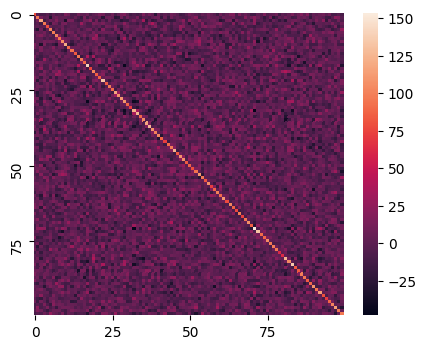

In [3]:
def estimate_covariance(X):
    '''estimate the covariance matrix
    Input: data matrix X (size: NxD) 
    Output: covariance matrix cov (size: DxD)'''

    mu = np.mean(X, axis=0)
    t = X - mu
    return (len(t) - 1)**-1 * t.T @ t


D_features = 100
N_samples = 200
X, true_cov = sample_generator(N_samples, D_features)

# estimate covariance using your implementation
cov = estimate_covariance(X)

# for comparison: estimate covariance using the numpy-function
cov_np = np.cov(X, rowvar=False)
print("Is the COVxy same as Numpy's?\t",
      (cov_np.astype(int) == cov.astype(int)).all())  #compare with Numpy

# plot the covariance matrix
import seaborn as sn
f2 = plt.figure(figsize=(5, 4), dpi=100)
sn.heatmap(cov, xticklabels=25, yticklabels=25)
plt.show()

## Bonus: Visualizing the eigenvectors of the covariance matrix

In this (optional) task, we want to shed light on the <span class="mark">relationship between the eigenvalues / eigenvectors of the covariance matrix and the shape of the normal distribution</span> in a 2D scenario. 

__Tasks__: 1.) Visualize a randomly sampled normal distribution (e.g. by using the seaborn function <span class="birk">sns.jointplot()</span>). The seaborn package is a matplotlib-based visualization package. You can install it by typing the following command in the terminal: __"sudo pip3 install seaborn"__. If you run the script and you do not see the data, also install the cairo backend with __"sudo pip3 install cairocffi"__.)

2.) Calculate eigenvalues and eigenvectors of the true covariance matrix.

3.) Draw the estimated eigenvectors multiplied by the square root of the corresponding eigenvalues in the same plot.

#### Q2.2.1 (Bonus) What do you observe regarding the size of the eigenvalues and the shape of the covariance matrix?

#### Q2.2.2 (Bonus) If the eigenvalues are over -  or underestimated, what does this mean for the estimated shape of the normal distribution?

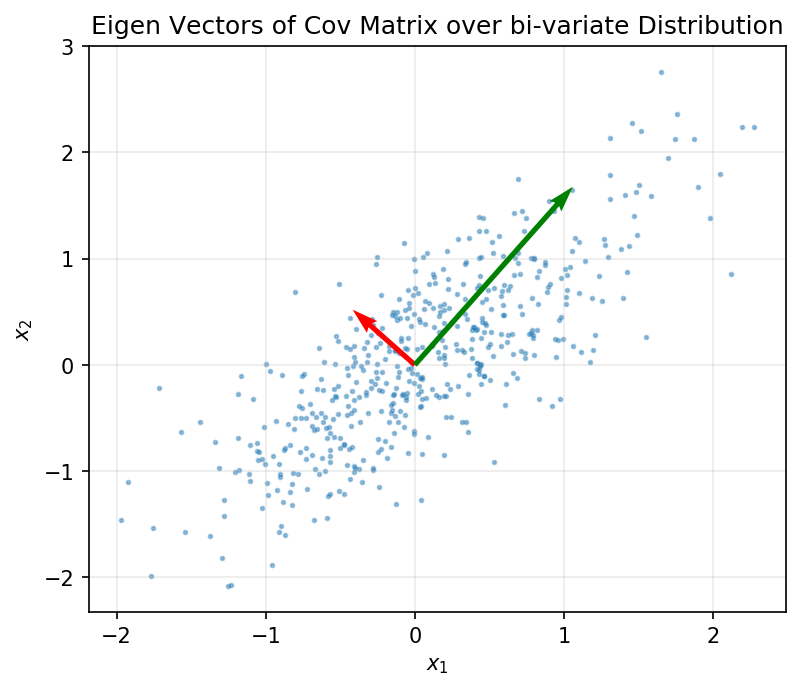

In [4]:
# draws randomly sampled distribution
np.random.seed(1235)
D_features = 2
N_samples = 500
Xr, true_cov = sample_generator(N_samples, D_features)

covXr = np.cov(Xr, rowvar=False)
EvalXr, EvecXr = np.linalg.eigh(covXr) #since, covXr is real and Symmetric
t = np.array([EvecXr[:,_]*EvalXr[_]**0.5 for _ in range(len(covXr))])
# t = np.array([EvecXr[:,_] for _ in range(len(covXr))])


# Visualise
f2 = plt.figure(dpi=150, figsize=(6,5))

# !! issues drawing plt.quiver() over the sn.jointplot() !!
# sn.jointplot(Xr[:,0], Xr[:,1], zorder=1, alpha=0.2, kind="scatter")
# using plt.scatter() instead


plt.scatter(Xr[:,0], Xr[:,1], marker="o", s=3,zorder=1, alpha=0.4)
plt.quiver(0,0, t[:,0], t[:,1], color=["r", "g"], zorder=3, scale=3)
plt.title("Eigen Vectors of Cov Matrix over bi-variate Distribution")
plt.xlabel(r"$x_1$"); plt.ylabel(r"$x_2$")
plt.grid("True", lw=.2)
plt.draw()



## Eigenvalue Spectrum for various sample sizes

__Tasks:__ For a fixed number of features $D_{features} = 100$, vary the number of samples $N_{samples}$ and implement the following steps:
 1. Estimate the covariance matrix from the generated samples X
 2. Calculate the eigenvalues of the covariance
 3. Sort the eigenvalues in descending order
 4. Plot the eigenvalues as a function of their order/rank (called eigenvalue spectrum)

This procedure should be repeated for the given sample sizes $N_{samples}=[20,50,100,300,1000]$ and all eigenvalue spectra shown in one figure. For comparison, repeat the steps (2)-(4) also for the true covariance matrix and add this eigenvalue spectrum to the created figure. Here is an example obtained for a given ground truth covariance matrix and one calculated using 120 samples from the same distribution

![title](data/eigenvalue_spectrum.png)

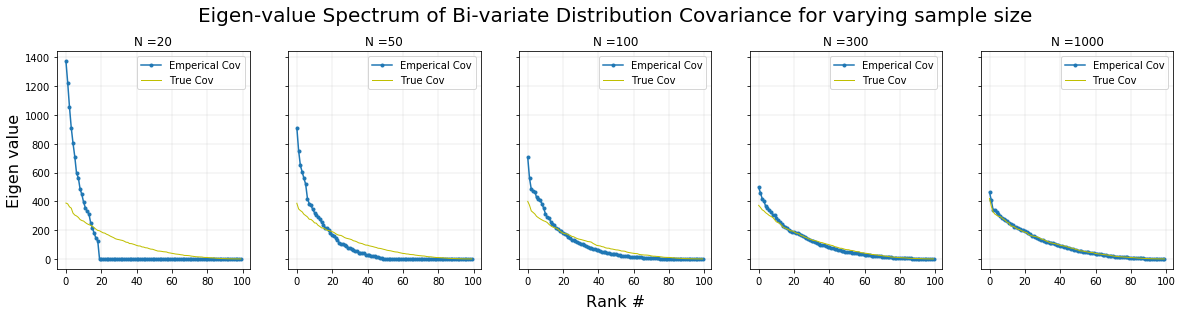

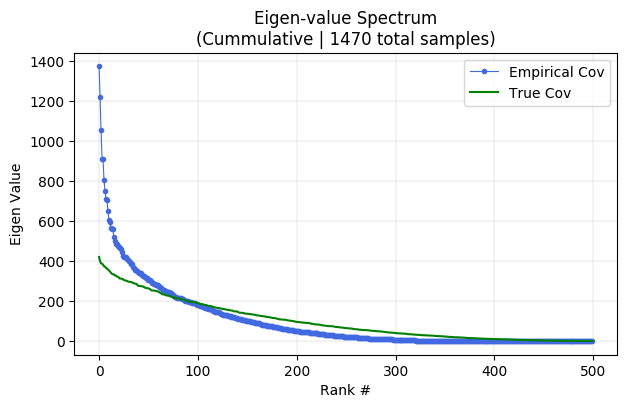

In [5]:
D_features = 100
Num_samples = [20, 50, 100, 300, 1000]
EvalSorted = []
EvalTrueSorted = []

f3, ax3 = plt.subplots(1,
                       len(Num_samples),
                       figsize=(20, 4),
                       sharey=True,
                       sharex=True,
                       squeeze=True)

for index, N_samples in enumerate(Num_samples):

    # generate data set with N_samples
    X, true_cov = sample_generator(N_samples, D_features)

    # estimate covariance from the data X
    CovX = np.cov(X, rowvar=False)

    # calculate eigenvectors of estimated covariance
    EvalX = np.linalg.eigh(CovX)[0]
    EvalSorted.extend(EvalX)
    EvalTrueSorted.extend(np.linalg.eigh(true_cov)[0])

    # plot the eigenvalue-spectrum for each sample configuration
    ax3[index].plot(np.sort(EvalX)[::-1], ".-")
    ax3[index].plot(np.sort(np.linalg.eigh(true_cov)[0])[::-1], "y", lw=1)
    ax3[index].set_title("N =" + str(N_samples))
    ax3[index].grid(True, lw=0.2); ax3[index].legend(["Emperical Cov", "True Cov"])

plt.subplots_adjust(wspace=.2)
f3.add_subplot(111, frameon=False)
plt.title(
    "Eigen-value Spectrum of Bi-variate Distribution Covariance for varying sample size",
    pad=30,
    fontsize=20)
plt.xlabel("Rank #", labelpad=25, fontsize=16)
plt.ylabel("Eigen value", labelpad=35, fontsize=16)
plt.xticks([])
plt.yticks([])

# Calculate and plot eigenvalue spectrum of true covariance matrix
f4 = plt.figure(figsize=(7, 4), dpi=100)
plt.plot(np.sort(EvalSorted)[::-1], ".-", c="RoyalBlue", lw=0.8)
plt.plot(np.sort(EvalTrueSorted)[::-1], c="Green")
plt.legend(["Empirical Cov", "True Cov"])
plt.xlabel("Rank #")
plt.ylabel("Eigen Value")
plt.title("Eigen-value Spectrum" + "\n" + "(Cummulative | " +
          str(np.sum(Num_samples)) + " total samples)")
plt.grid(True, lw=0.2)
plt.show()

#### Q2.2.3) What do you observe for the largest and smallest estimates of the eigenvalues?
    A: The largest eigen value estimates vary greatly from the corresponding "true" covariance eigen values. However, the small estimates tend not to vary by much. This trend disappears as more samples are drawn from the distribution. 


#### Q2.2.4) What do you observe for an increasing number of N_samples?
    A: In addition to the point mentioned above, it appears that when estimating the eigen values of covariance from a small data set, the a few eigen vectors dominate much more than others. Which could explain the large eigen values for small data sets. When the sample size is increased, more and more eigen vectors are then involved in representing the direction of variance.

#### Q2.2.5) Which condition for the N_samples in relation to D_features is necessary to allow a training of the LDA?
    A: To avoid degeneracy, N >= D. If N<D, the Eigen values of the Covariance matrix vary considerably from the true covarience. That is, if the estimate of the covariance of the distribution is incorrect, the errors will certainly compound when taking the inverse (or the pseudo inverse) of the Cov. Mat
    

#### Q2.2.6) How can you manipulate your DATA to avoid this problem, in case of N_samples < D_features?
    A: Since, the number of samples in the real world will be practically limited, one can't increase N. So, a good idea will be to reduce the number of Dimensions by inspecting the data and discovering dominant dimensions (ie., Dimensionality Reduction).

## Bonus:  Improving covariance estimation by means of regularization

You may have observed a systematic error in the eigenvalues estimates, even for N_samples > D_features. 

#### Q2.2.7) (Bonus) Investigate a way to compensate for this systematic error such that the estimated spectrum approximates the true spectrum more closely. __Hint:__ Regularized estimation of covariance matrix.

In [6]:
def mean_squared_error(y_pred, y_true):
    ''' returns the mean squared error 
    Input:estimated eigenvalue spectrum y_pred of size D 
          true eigenvalue spectrum y_true of size D
    Output: mean squared error ms_error'''
    
    y_true = np.sort(np.real(y_true))
    y_pred = np.sort(np.real(y_pred))
    ms_error = np.linalg.norm(y_pred-y_true)
    
    return ms_error

def regularized_covariance(X):
    # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #
    # Implement here your improved estimation of the covariance matrix #
    # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #
    improved_cov = np.cov(X.T)
    return improved_cov

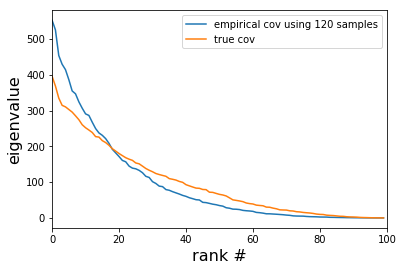

The mean squared error vs no regularized is 385.0
The mean squared error vs regularized is 385.0


In [7]:
# this seed ensures comparable results when repeating the calculation. Please keep this unchanged!!!
np.random.seed(1337)

# please keep this N_samples unchanged!
N_samples = 120
X, true_cov = sample_generator(N_samples, D_features)

# true eigenvalue spectrum (sorted)
true_w, true_v = np.linalg.eig(true_cov)
true_w = np.array(sorted(true_w, reverse=True))

# calculate eigenvectors of estimated covariance 
emp_cov = np.cov(X.T)
emp_w, emp_v = np.linalg.eig(emp_cov)
emp_w = np.array(sorted(np.real(emp_w), reverse=True))

# Your approach
improved_cov = regularized_covariance(X)
improved_w, emp_v = np.linalg.eig(improved_cov)
improved_w = np.array(sorted(np.real(improved_w), reverse=True))


plt.figure()
plt.plot(emp_w, label='empirical cov using %s samples' % N_samples)
plt.plot(true_w, label='true cov')
plt.xlabel('rank #', fontsize=16)
plt.ylabel('eigenvalue', fontsize=16)
plt.xlim(0,100)
plt.legend()
plt.show()

# report on the mean squared error between true covariance and your covariance estimation
# as a baseline, you need to improve upon the mean squared error between emp_w and true_w
error = mean_squared_error(emp_w,true_w)
print('The mean squared error vs no regularized is %.1f' %error)

error = mean_squared_error(improved_w,true_w)
print('The mean squared error vs regularized is %.1f' %error)